# CMSC320 Final Project Prototype
---

In [182]:
# Enter into terminal to update website: jupyter nbconvert --to html index.ipynb
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import selenium.webdriver as webdriver
import contextlib2
sns.set(style="darkgrid")
%matplotlib inline
# Get list of team initials to create nested for loop for schedules
teams = ['ATL','BOS','BRK','CHI','CHO','CLE','DAL','DEN','DET','GSW','HOU','IND','LAC','LAL','MEM','MIA','MIL',
         'MIN','NOP','NYK','OKC','ORL','PHI','PHO','POR','SAC','SAS','TOR','UTA','WAS']
defunct = ['NJN','CHA','CHH','SFW','SDR','SDC','BUF','VAN','NOK','NOH','SEA','KCK','KCO','CIN','NOJ','WSB','CAP',
           'BAL']
associated = {'BRK':['NJN'],'CHO':['CHA','CHH'],'GSW':['SFW'],'HOU':['SDR'],'LAC':['SDC','BUF'],'MEM':['VAN'],
             'NOP':['NOK','NOH'],'OKC':['SEA'],'SAC':['KCK','KCO','CIN'],'UTA':['NOJ'],'WAS':['WSB','CAP','BAL']}
mvp = ['i/iversal01', 'd/duncati01', 'd/duncati01', 'g/garneke01', 'n/nashst01', 'n/nashst01', 'n/nowitdi01', 
       'b/bryanko01', 'j/jamesle01', 'j/jamesle01', 'r/rosede01', 'j/jamesle01', 'j/jamesle01', 'd/duranke01', 
       'c/curryst01', 'c/curryst01', 'w/westbru01', 'h/hardeja01', 'a/antetgi01']
mvp_names = {'i/iversal01': 'Allen Iverson', 'd/duncati01': 'Tim Duncan', 'g/garneke01': 'Kevin Garnett',
            'n/nashst01': 'Steve Nash', 'n/nowitdi01': 'Dirk Nowitzki', 'b/bryanko01': 'Kobe Bryant',
            'j/jamesle01': 'LeBron James', 'r/rosede01': 'Derrick Rose', 'd/duranke01': 'Kevin Durant',
            'c/curryst01': 'Stephen Curry', 'w/westbru01': 'Russell Westbrook', 'h/hardeja01': 'James Harden',
            'a/antetgi01': 'Giannis Antetokounmpo'}
mvp_years = {'Allen Iverson': ['2000'], 'Tim Duncan': ['2001','2002'], 'Kevin Garnett': ['2003'], 
             'Steve Nash': ['2004', '2005'], 'Dirk Nowitzki': ['2006'], 'Kobe Bryant': ['2007'],
            'LeBron James': ['2008', '2009', '2011', '2012'], 'Derrick Rose': ['2010'], 'Kevin Durant': ['2013'],
            'Stephen Curry': ['2014', '2015'], 'Russell Westbrook': ['2016'], 'James Harden': ['2017'],
            'Giannis Antetokounmpo': ['2018']}

## Schedule Database Builder:
    # Not feasible to run every time, export to csv
    for t in teams:
        games = [None]*51
        for i in range(0,51):
            try:
                table = pd.read_html('https://www.basketball-reference.com/teams/' + t + '/' + str(i+1969) \
                                     + '_games.html')[0]
            except:
                # print("Failed: " + t + " " + str(i+1969))
                continue
            games[i] = table
            games[i].drop(columns=['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 8', 'Notes'], inplace=True)
            games[i].rename(columns={'Unnamed: 7': 'Result'}, inplace=True)
            games[i].set_index(keys='G', inplace=True)
            if i < 2000:
                games[i].drop(columns=['Start (ET)'], inplace=True)
            games[i].dropna(inplace=True)
            if i >= 2000:
                games[i]['Date'] = pd.to_datetime(games[i]['Date'] + ' ' + games[i]['Start (ET)'])
                games[i].drop(columns=['Start (ET)'], inplace=True)
            else:
                games[i]['Date'] = pd.to_datetime(games[i]['Date'])
            games[i]['Record'] = games[i]['W'] +'-' + games[i]['L']
            games[i].drop(columns=['W','L'], inplace=True)
            games[i]['Margin'] = [int(x) - int(y) for x,y in zip(games[i]['Tm'],games[i]['Opp'])]
            # print("Checking: " + t + " " + str(i+1969))
            games[i].to_csv("Schedules/" + t + "_" + str(i + 1969) + '.csv')
    for t in defunct:
        games = [None]*51
        for i in range(0,51):
            try:
                table = pd.read_html('https://www.basketball-reference.com/teams/' + t + '/' + str(i+1969) \
                                     + '_games.html')[0]
            except:
                 print("Failed: " + t + " " + str(i+1969))
                continue
            games[i] = table
            games[i].drop(columns=['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 8', 'Notes'], inplace=True)
            games[i].rename(columns={'Unnamed: 7': 'Result'}, inplace=True)
            games[i].set_index(keys='G', inplace=True)
            if i < 2000:
                games[i].drop(columns=['Start (ET)'], inplace=True)
            games[i].dropna(inplace=True)
            if i >= 2000:
                games[i]['Date'] = pd.to_datetime(games[i]['Date'] + ' ' + games[i]['Start (ET)'])
                games[i].drop(columns=['Start (ET)'], inplace=True)
            else:
                games[i]['Date'] = pd.to_datetime(games[i]['Date'])
            games[i]['Record'] = games[i]['W'] +'-' + games[i]['L']
            games[i].drop(columns=['W','L'], inplace=True)
            games[i]['Margin'] = [int(x) - int(y) for x,y in zip(games[i]['Tm'],games[i]['Opp'])]
             print("Checking: " + t + " " + str(i+1969))
            games[i].to_csv("Schedules/DEFUNCT_"+ t + "_" + str(i + 1969) + '.csv')

In [255]:
schedules = {}
for t in teams:
    games = [None]*51
    for i in range(0,51):
        try:
            games[i] = pd.read_csv('Schedules/' + t + '_' + str(i+1969) + '.csv',index_col='G',
                                   parse_dates=['Date'],infer_datetime_format=True)
        except:
            continue
    schedules[t] = games
# Associate defunct team schedules with current team schedules
for d in defunct:
    games = [None]*51
    for i in range(0,51):
        try:
            games[i] = pd.read_csv('Schedules/' + 'DEFUNCT_' + d + '_' + str(i+1969) + '.csv',index_col='G',
                                  parse_dates=['Date'],infer_datetime_format=True)
            for a in associated:
                for x in associated[a]:
                    if x == d:
                        schedules[a][i] = games[i] 
        except:
            continue

In [256]:
summary = pd.DataFrame(columns=['Team','W','L','Win_Pct'])
for t in schedules:
    wins = [None]*51
    losses = [None]*51
    i = 0
    for s in schedules[t]:
        try:
            wins[i] = pd.get_dummies(s['Result'])['W'].sum()
            losses[i] = pd.get_dummies(s['Result'])['L'].sum()
            i += 1
        except:
            continue
    wins = [x for x in wins if x is not None]
    losses = [x for x in losses if x is not None]
    win_pct = sum(wins)/(sum(wins) + sum(losses))
    summary = summary.append({'Team': t,'W': sum(wins),'L': sum(losses),'Win_Pct': win_pct}, ignore_index=True)
summary.sort_values(by='Win_Pct',ascending=False,inplace=True)
summary['Rank'] = summary['Win_Pct'].rank(ascending=False).astype(int)
summary.set_index('Rank',inplace=True)
summary

Team     W     L   Win_Pct
Rank                           
1     SAS  2162  1316  0.621622
2     LAL  2509  1625  0.606918
3     BOS  2380  1753  0.575853
4     OKC  2260  1874  0.546686
5     UTA  1964  1678  0.539264
6     POR  2134  1836  0.537531
7     HOU  2210  1924  0.534591
8     PHO  2186  1948  0.528786
9     MIA  1294  1200  0.518845
10    CHI  2143  1991  0.518384
11    MIL  2129  2005  0.514998
12    DET  2078  2056  0.502661
13    IND  1744  1733  0.501582
14    DAL  1572  1578  0.499048
15    ATL  2048  2086  0.495404
16    NYK  2039  2095  0.493227
17    DEN  1703  1775  0.489649
18    PHI  2022  2112  0.489115
19    GSW  1996  2138  0.482825
20    ORL  1158  1254  0.480100
21    TOR   902  1018  0.469792
22    NOP   643   735  0.466618
23    CLE  1848  2122  0.465491
24    WAS  1923  2211  0.465167
25    CHO  1027  1303  0.440773
26    SAC  1790  2344  0.432995
27    BRK  1428  1968  0.420495
28    MEM   792  1128  0.412500
29    LAC  1610  2360  0.405542
30    MIN   961  1451  0.398425

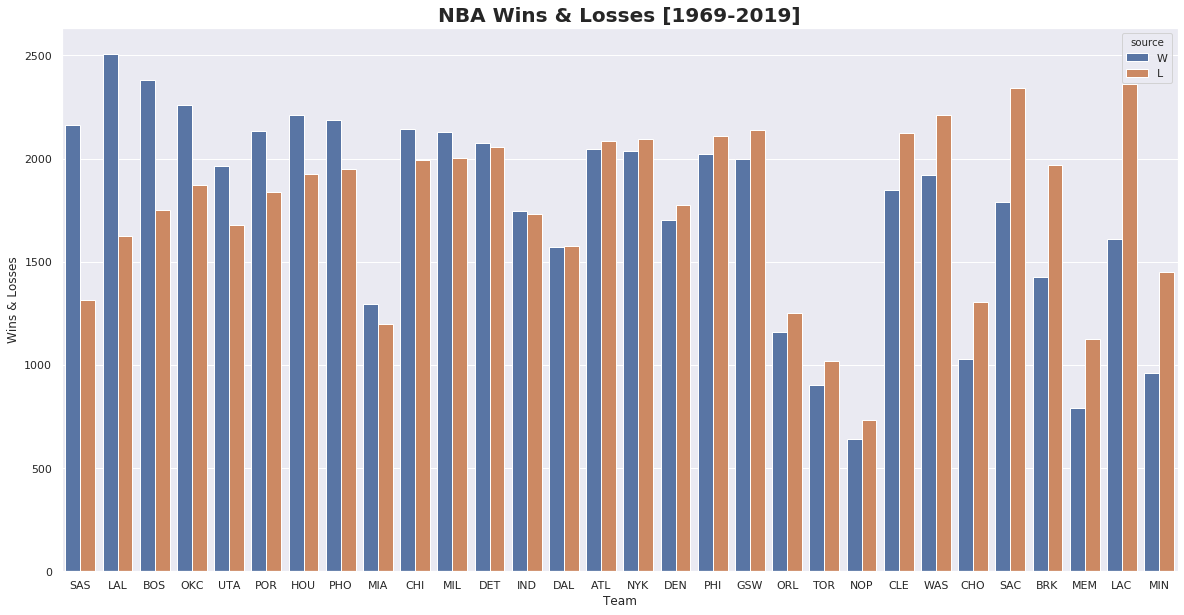

In [257]:
melted = pd.melt(summary, id_vars='Team', value_vars=['W','L'], var_name='source', value_name='W & L')
plt.figure(figsize=(20,10))
p = sns.barplot(x='Team',y='W & L', hue='source',data=melted)
plt.title('NBA Wins & Losses [1969-2019]', fontweight="bold", fontsize=20)
plt.xlabel('Team')
plt.ylabel('Wins & Losses')
plt.show()

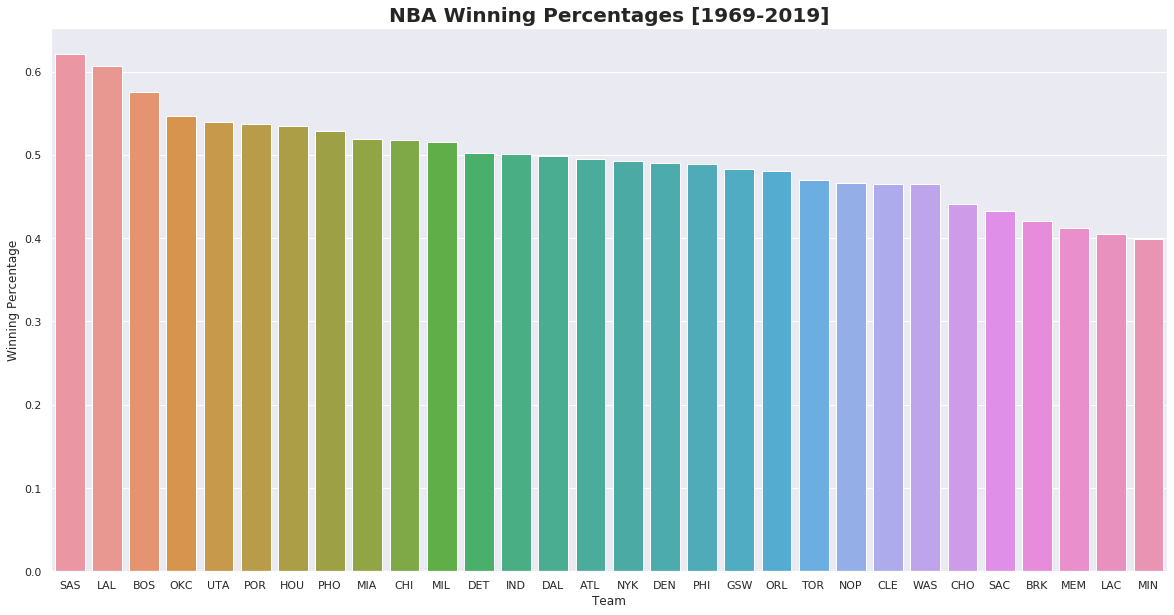

In [258]:
plt.figure(figsize=(20,10))
p = sns.barplot(x='Team',y='Win_Pct',data=summary)
plt.title('NBA Winning Percentages [1969-2019]', fontweight="bold", fontsize=20)
plt.xlabel('Team')
plt.ylabel('Winning Percentage')
plt.show()

In [259]:
seasons = {}
for t in schedules:
    seasons[t] = pd.DataFrame(columns=['Year','W','L','Win_Pct'])
    for s in schedules[t]:
        try:
            wins = pd.get_dummies(s['Result'])['W'].sum()
            losses = pd.get_dummies(s['Result'])['L'].sum()
        except:
            continue
        try:
            seasons[t] = seasons[t].append({'Year': pd.DatetimeIndex(s['Date']).year[0], 'W': wins, 
                                            'L': losses, 'Win_Pct': wins/(wins+losses)}, ignore_index=True)
        except:
            continue
    seasons[t].Year = seasons[t].Year.astype(int)
    seasons[t].W = seasons[t].W.astype(int)
    seasons[t].L = seasons[t].L.astype(int)
seasons['PHO']

Year   W   L   Win_Pct
0   1968  16  66  0.195122
1   1969  39  43  0.475610
2   1970  48  34  0.585366
3   1971  49  33  0.597561
4   1972  38  44  0.463415
5   1973  30  52  0.365854
6   1974  32  50  0.390244
7   1975  42  40  0.512195
8   1976  34  48  0.414634
9   1977  49  33  0.597561
10  1978  50  32  0.609756
11  1979  55  27  0.670732
12  1980  57  25  0.695122
13  1981  46  36  0.560976
14  1982  53  29  0.646341
15  1983  41  41  0.500000
16  1984  36  46  0.439024
17  1985  32  50  0.390244
18  1986  36  46  0.439024
19  1987  28  54  0.341463
20  1988  55  27  0.670732
21  1989  54  28  0.658537
22  1990  55  27  0.670732
23  1991  53  29  0.646341
24  1992  62  20  0.756098
25  1993  56  26  0.682927
26  1994  59  23  0.719512
27  1995  41  41  0.500000
28  1996  40  42  0.487805
29  1997  56  26  0.682927
30  1999  27  23  0.540000
31  1999  53  29  0.646341
32  2000  51  31  0.621951
33  2001  36  46  0.439024
34  2002  44  38  0.536585
35  2003  29  53  0.353659
36  2004  62  20  0.756098
37  2005  54  28  0.658537
38  2006  61  21  0.743902
39  2007  55  27  0.670732
40  2008  46  36  0.560976
41  2009  54  28  0.658537
42  2010  40  42  0.487805
43  2011  33  33  0.500000
44  2012  25  57  0.304878
45  2013  48  34  0.585366
46  2014  39  43  0.475610
47  2015  23  59  0.280488
48  2016  24  58  0.292683
49  2017  21  61  0.256098
50  2018  19  63  0.231707

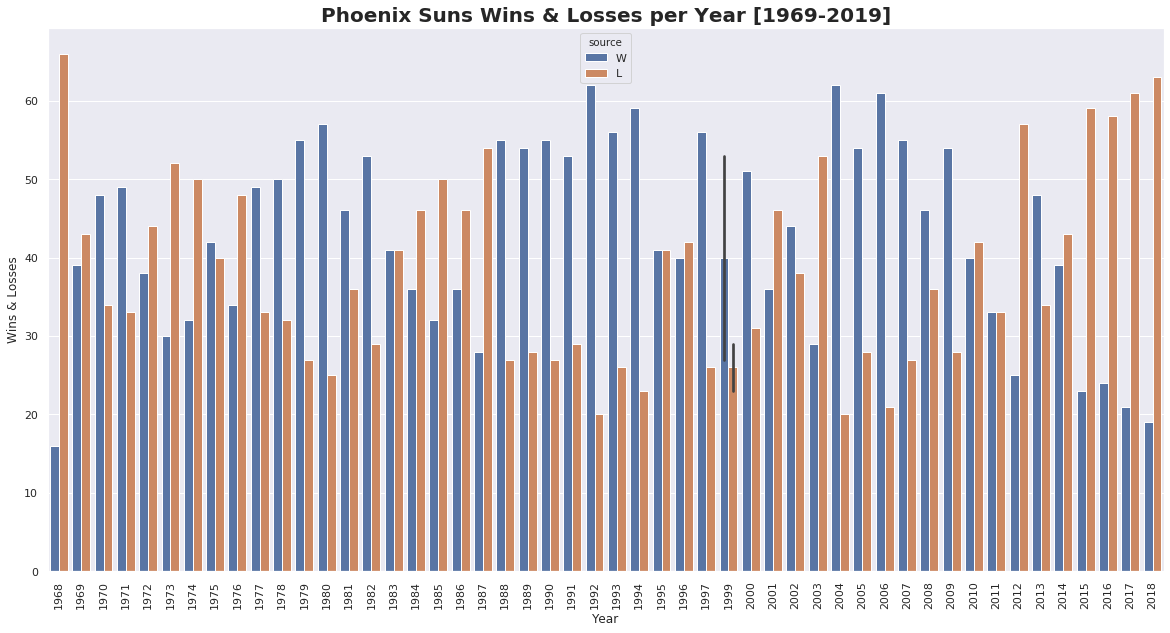

In [260]:
melted = pd.melt(seasons['PHO'], id_vars='Year', value_vars=['W','L'], var_name='source', value_name='W & L')
plt.figure(figsize=(20,10))
p = sns.barplot(x='Year',y='W & L', hue='source',data=melted)
plt.title('Phoenix Suns Wins & Losses per Year [1969-2019]', fontweight="bold", fontsize=20)
plt.xlabel('Year')
plt.ylabel('Wins & Losses')
plt.xticks(rotation='vertical')
plt.show()

2004


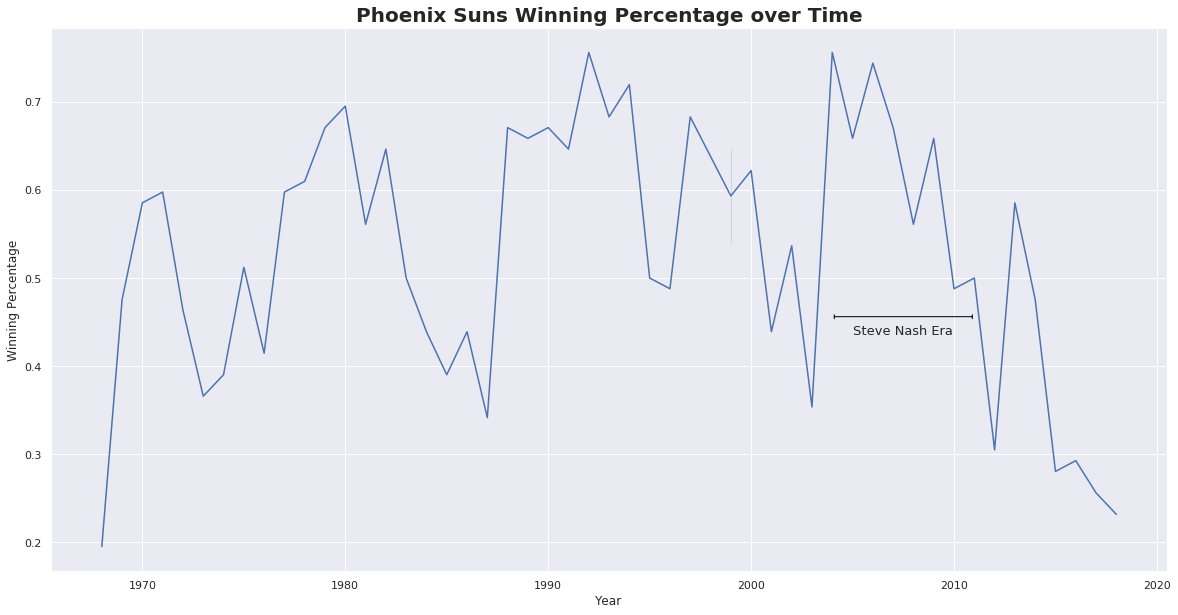

In [261]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x='Year', y='Win_Pct', data=seasons['PHO'], ax=ax)
x = seasons['PHO'].Year.values[36]
y = seasons['PHO'].Win_Pct.values[36]
ax.annotate('Steve Nash Era', xy=(x+3.5, y-.32), xycoords='data', size=13, ha='center', textcoords='data')
ax.annotate('', xy=(x, y-.3), xytext=(x+7, y-.3), xycoords='data', textcoords='data',
            arrowprops=dict(arrowstyle='|-|,widthA=0.2,widthB=0.2', color='black'))
plt.title('Phoenix Suns Winning Percentage over Time', fontweight="bold", fontsize=20)
plt.xlabel('Year')
plt.ylabel('Winning Percentage')
plt.show()

## MVP Stats
___

## MVP Statistics Database Builder
    i = 0
    for m in mvp:
        if not (os.path.isfile('MVP/' + m + '/' + 'Table' + '_1.csv')):
            @contextlib2.contextmanager
            def quitting(thing):
                yield thing
                thing.quit()

            with quitting(webdriver.Firefox()) as driver:
                link = 'https://www.basketball-reference.com/players/' + m + '.html' 
                driver.get(link)
                content = driver.page_source
                with open('/tmp/out.html', 'wb') as f:
                    f.write(content.encode('utf-8'))
                data = pd.read_html(content)

            # Split Retired players and unretired(or just retired) players because there is an extra table on current
            # player pages
            if (m in ['i/iversal01', 'd/duncati01', 'g/garneke01', 'n/nashst01', 'b/bryanko']):
                j = 1
                for d in data[8:13]:
                    d.to_csv('MVP/' + m + '/' + 'Table' + '_' + str(j) + '.csv')
                    j += 1
            else:
                j = 1
                for d in data[9:14]:
                    d.to_csv('MVP/' + m + '/' + 'Table' + '_' + str(j) + '.csv')
                    j += 1

        onoff = pd.read_html('https://www.basketball-reference.com/players/' + m + '/on-off/' + str(i+2001))[0]
        team = onoff['Team'].copy(deep=True)
        team['Split'] = {'On Court', 'Off Court', 'On-Off'}
        team.set_index('Split',inplace=True)
        team.to_csv('MVP/' + m + '/' + str(i+2000) + '_' + 'OnOff[Team]' + '.csv')
        opp = onoff['Opponent'].copy(deep=True)
        opp['Split'] = {'On Court', 'Off Court', 'On-Off'}
        opp.set_index('Split',inplace=True)
        opp.to_csv('MVP/' + m + '/' + str(i+2000) + '_' + 'OnOff[Opp]' + '.csv')
        diff = onoff['Opponent'].copy(deep=True)
        diff['Split'] = {'On Court', 'Off Court', 'On-Off'}
        diff.set_index('Split',inplace=True)
        diff.to_csv('MVP/' + m + '/' + str(i+2000) + '_' + 'OnOff[Diff]' + '.csv')
        i += 1

In [279]:
per_game = {}
for m in mvp:
    n = mvp_names[m]
    per_game[n] = pd.read_csv('MVP/' + m + '/' + 'Table' + '_1.csv')
    per_game[n].replace('Did Not Play\xa0(injury—ACL)',np.nan,inplace=True)
    per_game[n].dropna(inplace=True)
    per_game[n]['Season'] = [pd.to_datetime(str(x).split('-')[0]) for x in per_game[n]['Season']]
    per_game[n]['Age'] = per_game[n]['Age'].astype(int)
    per_game[n]['G'] = per_game[n]['G'].astype(int)
    per_game[n]['GS'] = per_game[n]['GS'].astype(int)
    per_game[n] = per_game[n][per_game[n]['Season'].isin(mvp_years[n])]
    per_game[n].reset_index(inplace=True,drop=True)
    per_game[n].drop(columns=['Unnamed: 0'],inplace=True)
    per_game[n] = per_game[n].loc[:, ['Season', 'Tm', 'Pos', 'G', 'MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
                                      'FG%', '3P%', 'eFG%', 'FT%']]

In [248]:
totals = {}
for m in mvp:
    n = mvp_names[m]
    totals[n] = pd.read_csv('MVP/' + m + '/' + 'Table' + '_2.csv')
    totals[n].replace('Did Not Play\xa0(injury—ACL)',np.nan,inplace=True)
    totals[n].dropna(inplace=True)
    totals[n]['Season'] = [pd.to_datetime(str(x).split('-')[0]) for x in totals[n]['Season']]
    totals[n]['Age'] = totals[n]['Age'].astype(int)
    totals[n]['G'] = totals[n]['G'].astype(int)
    totals[n]['GS'] = totals[n]['GS'].astype(int)
    totals[n] = totals[n][totals[n]['Season'].isin(mvp_years[n])]
    totals[n].reset_index(inplace=True,drop=True)
    totals[n].drop(columns=['Unnamed: 0'],inplace=True)
    totals[n] = totals[n].loc[:, ['Season', 'Tm', 'Pos', 'G', 'MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
                                      'FG%', '3P%', 'eFG%', 'FT%']]

In [249]:
per_36 = {}
for m in mvp:
    n = mvp_names[m]
    per_36[n] = pd.read_csv('MVP/' + m + '/' + 'Table' + '_3.csv')
    per_36[n].replace('Did Not Play\xa0(injury—ACL)',np.nan,inplace=True)
    per_36[n].dropna(inplace=True)
    per_36[n]['Season'] = [pd.to_datetime(str(x).split('-')[0]) for x in per_36[n]['Season']]
    per_36[n]['Age'] = per_36[n]['Age'].astype(int)
    per_36[n]['G'] = per_36[n]['G'].astype(int)
    per_36[n]['GS'] = per_36[n]['GS'].astype(int)
    per_36[n] = per_36[n][per_36[n]['Season'].isin(mvp_years[n])]
    per_36[n].reset_index(inplace=True,drop=True)
    per_36[n].drop(columns=['Unnamed: 0'],inplace=True)
    per_36[n] = per_36[n].loc[:, ['Season', 'Tm', 'Pos', 'G', 'MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
                                      'FG%', '3P%', 'eFG%', 'FT%']]

In [250]:
per_100 = {}
for m in mvp:
    n = mvp_names[m]
    per_100[n] = pd.read_csv('MVP/' + m + '/' + 'Table' + '_4.csv')
    per_100[n].replace('Did Not Play\xa0(injury—ACL)',np.nan,inplace=True)
    if 'Unnamed: 29' in per_100[n].columns:
        per_100[n].drop(columns=['Unnamed: 29'],inplace=True)
    per_100[n].dropna(inplace=True)
    per_100[n]['Season'] = [pd.to_datetime(str(x).split('-')[0]) for x in per_100[n]['Season']]
    per_100[n]['Age'] = per_100[n]['Age'].astype(int)
    per_100[n]['G'] = per_100[n]['G'].astype(int)
    per_100[n]['GS'] = per_100[n]['GS'].astype(int)
    per_100[n] = per_100[n][per_100[n]['Season'].isin(mvp_years[n])]
    per_100[n].reset_index(inplace=True,drop=True)
    per_100[n].drop(columns=['Unnamed: 0'],inplace=True)
    per_100[n] = per_100[n].loc[:, ['Season', 'Tm', 'Pos', 'G', 'MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
                                      'FG%', '3P%', 'FT%']]

In [251]:
advanced = {}
for m in mvp:
    n = mvp_names[m]
    advanced[n] = pd.read_csv('MVP/' + m + '/' + 'Table' + '_5.csv')
    if 'Unnamed: 19' in advanced[n].columns:
        advanced[n].drop(columns=['Unnamed: 19', 'Unnamed: 24'],inplace=True)
    advanced[n].replace('Did Not Play\xa0(injury—ACL)',np.nan,inplace=True)
    advanced[n].dropna(inplace=True)
    advanced[n]['Season'] = [pd.to_datetime(str(x).split('-')[0]) for x in advanced[n]['Season']]
    advanced[n]['Age'] = advanced[n]['Age'].astype(int)
    advanced[n]['G'] = advanced[n]['G'].astype(int)
    advanced[n] = advanced[n][advanced[n]['Season'].isin(mvp_years[n])]
    advanced[n].reset_index(inplace=True,drop=True)
    advanced[n].drop(columns=['Unnamed: 0'],inplace=True)
    advanced[n] = advanced[n].loc[:, ['Season', 'Tm', 'Pos', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'TRB%', 
                                      'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 
                                     'OBPM', 'DBPM', 'BPM', 'VORP']]

In [200]:
team_onoff = {}
for m in mvp:
    n = mvp_names[m]
    team_onoff[n] = {}
    for y in mvp_years[n]:
        team_onoff[n][y] = pd.read_csv('MVP/' + m + '/' + y + '_OnOff[Team].csv')

In [198]:
opp_onoff = {}
for m in mvp:
    n = mvp_names[m]
    opp_onoff[n] = {}
    for y in mvp_years[n]:
        opp_onoff[n][y] = pd.read_csv('MVP/' + m + '/' + y + '_OnOff[Opp].csv')

In [199]:
diff_onoff = {}
for m in mvp:
    n = mvp_names[m]
    diff_onoff[n] = {}
    for y in mvp_years[n]:
        diff_onoff[n][y] = pd.read_csv('MVP/' + m + '/' + y + '_OnOff[Diff].csv')

In [315]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(pd.to_datetime(point['x']), point['y']+.1, point['val'], rotation=20)

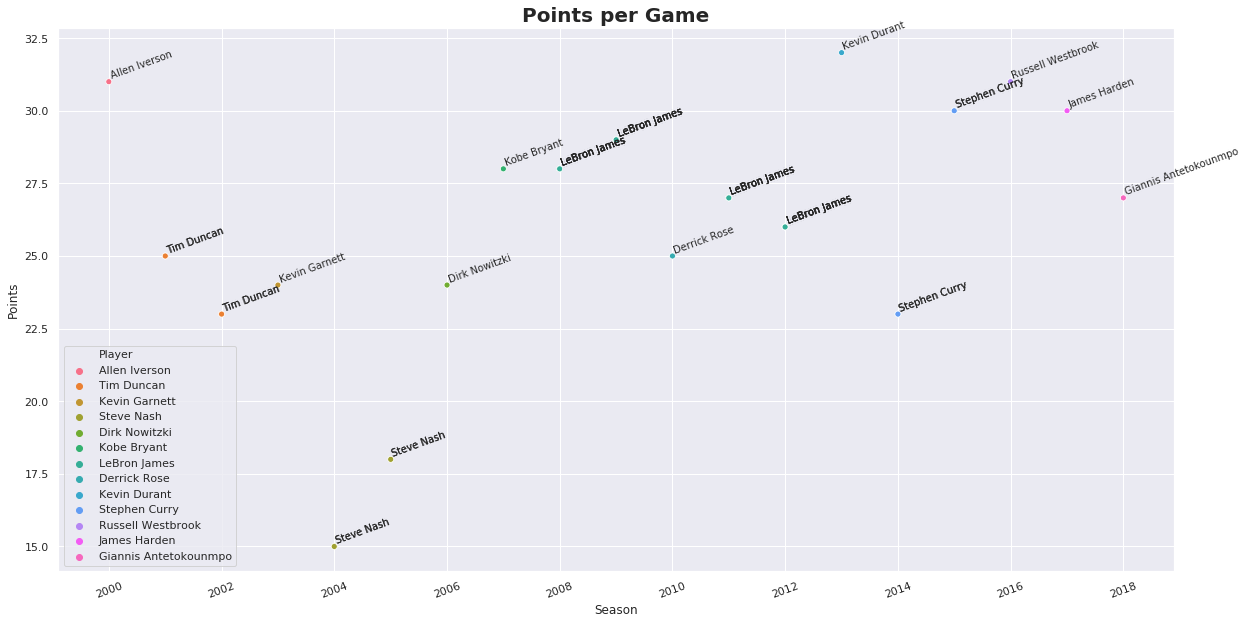

In [316]:
pts = pd.DataFrame(columns=['Player', 'Season', 'PTS'])

for m in mvp:
    n = mvp_names[m]
    for i in range(0,len(per_game[n]['Season'])):
        pts = pts.append({'Player': n, 'Season': per_game[n]['Season'][i], 
                          'PTS': int(float(per_game[n]['PTS'][i]))}, ignore_index=True)

plt.figure(figsize=(20,10))
label_point(pts['Season'], pts['PTS'], pts['Player'], plt.gca())
p = sns.scatterplot(x='Season',y='PTS', hue='Player',data=pts)
plt.title('Points per Game', fontweight="bold", fontsize=20)
plt.xlabel('Season')
plt.ylabel('Points')
plt.xticks(rotation='20')
plt.show()

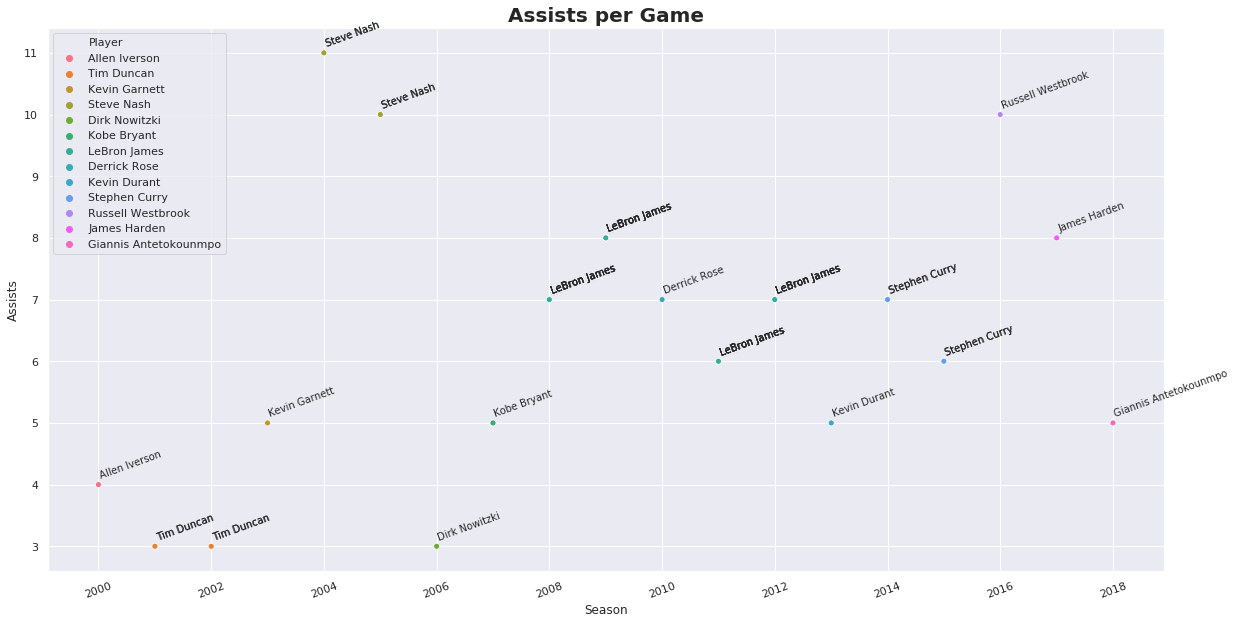

In [317]:
pts = pd.DataFrame(columns=['Player', 'Season', 'AST'])

for m in mvp:
    n = mvp_names[m]
    for i in range(0,len(per_game[n]['Season'])):
        pts = pts.append({'Player': n, 'Season': per_game[n]['Season'][i], 
                          'AST': int(float(per_game[n]['AST'][i]))}, ignore_index=True)

plt.figure(figsize=(20,10))
label_point(pts['Season'], pts['AST'], pts['Player'], plt.gca())
p = sns.scatterplot(x='Season',y='AST', hue='Player',data=pts)
plt.title('Assists per Game', fontweight="bold", fontsize=20)
plt.xlabel('Season')
plt.ylabel('Assists')
plt.xticks(rotation='20')
plt.show()

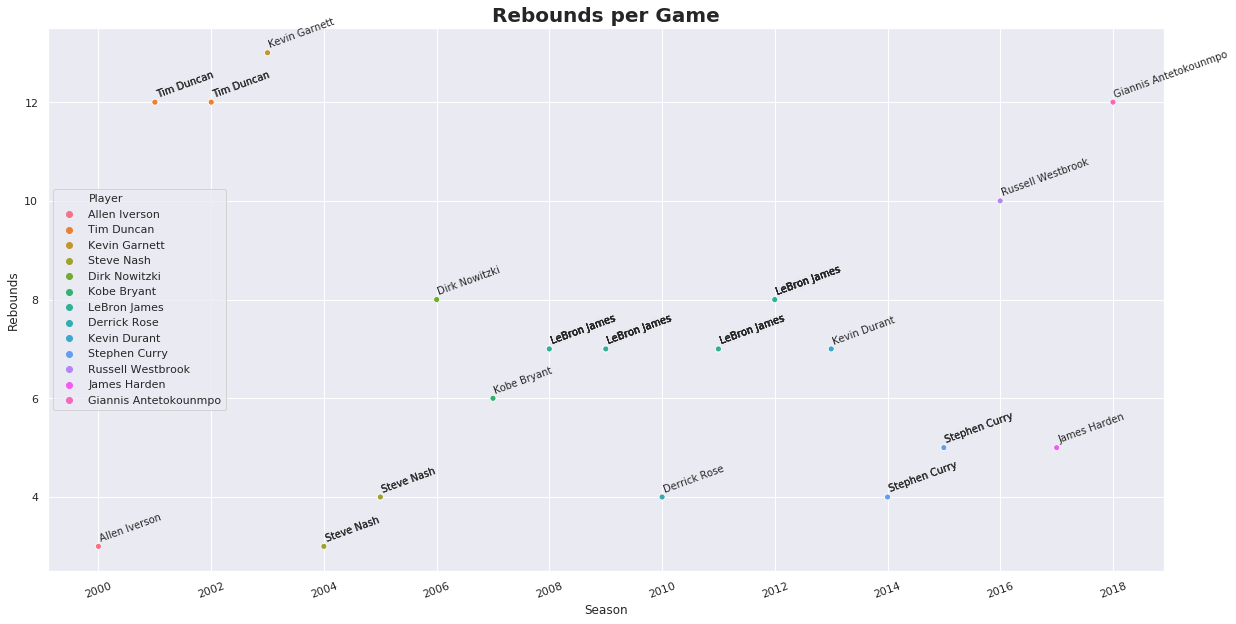

In [320]:
pts = pd.DataFrame(columns=['Player', 'Season', 'TRB'])

for m in mvp:
    n = mvp_names[m]
    for i in range(0,len(per_game[n]['Season'])):
        pts = pts.append({'Player': n, 'Season': per_game[n]['Season'][i], 
                          'TRB': int(float(per_game[n]['TRB'][i]))}, ignore_index=True)

plt.figure(figsize=(20,10))
label_point(pts['Season'], pts['TRB'], pts['Player'], plt.gca())
p = sns.scatterplot(x='Season',y='TRB', hue='Player',data=pts)
plt.title('Rebounds per Game', fontweight="bold", fontsize=20)
plt.xlabel('Season')
plt.ylabel('Rebounds')
plt.xticks(rotation='20')
plt.show()